In [1]:
!nvidia-smi

Wed Mar 12 07:35:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 1.Download the pretrained weights for Grounding Dino and SAM

In [2]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


In [3]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 463 (delta 175), reused 135 (delta 135), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 40.06 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 838.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━

In [4]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-8i38pzww
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-8i38pzww
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=a50f7ffcf16cf00999bad651fac3648298b4c384c3867486108154e1954a041b
  Stored in directory: /tmp/pip-ephem-wheel-cache-k3ddh09q/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything


In [5]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
groundingdino 0.1.0 requires supervision==0.4.0, but you have supervision 0.6.0 which is incompatible.
0.6.0


In [6]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [7]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [8]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [9]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [10]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


In [11]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/content/GroundingDINO/groundingdino/util/inference.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location="cpu")


In [13]:
SAM_ENCODER_VERSION = "vit_h"

In [14]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

/usr/local/lib/python3.11/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


# 2. Take a look at the cloth meta data

In [15]:
import pandas as pd
styles = pd.read_csv('/content/styles.csv', sep=',', on_bad_lines='skip', engine='python')

In [42]:
styles[styles['id']==9993]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
38494,9993,Women,Apparel,Bottomwear,Leggings,Beige,Fall,2011.0,Casual,Urban Yoga Women Anga Beige Leggings


so we use the column "id" and "articleTpe"

# 3. Image segmentation trial with 12 images (low resolution)

In [20]:
import cv2
import supervision as sv
import os
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
from segment_anything import SamPredictor

In [22]:
def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

In [23]:


# Define directories
IMAGES_DIRECTORY = "/content"
CSV_PATH = os.path.join(IMAGES_DIRECTORY, "styles.csv")

# Define detection thresholds
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25

# Load the CSV file (assumed to have columns: 'cloth_id' and 'type')
df = pd.read_csv('/content/styles.csv', sep=',', on_bad_lines='skip', engine='python')

# Convert to dictionary: {'9993': 'tops', '9998': 'leggings', ...}
cloth_mapping = dict(zip(df['id'].astype(str), df['articleType'].str.lower()))

# List images in the directory
image_paths = sv.list_files_with_extensions(directory=IMAGES_DIRECTORY, extensions=['jpg', 'jpeg', 'png'])

# Storage for images and annotations
images = {}
annotations = {}

# Process images with dynamic class prompts
for image_path in tqdm(image_paths):
    image_name = image_path.name  # Example: '9993.jpg'
    image_path = str(image_path)

    # Extract cloth ID from filename (remove extension)
    cloth_id = os.path.splitext(image_name)[0]

    # Get the corresponding class from CSV mapping
    class_name = cloth_mapping.get(cloth_id, "unknown")  # Default to "unknown" if not found

    if class_name == "unknown":
        print(f"Warning: Cloth ID {cloth_id} not found in CSV. Skipping...")
        continue

    print(f"Processing {image_name} with class: {class_name}")

    # Load image
    image = cv2.imread(image_path)

    # Run object detection with the correct dynamic class
    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=[class_name],  # Dynamically assigned class
        box_threshold=BOX_THRESHOLD,
        text_threshold=TEXT_THRESHOLD
    )

    # Filter valid detections
    detections = detections[detections.class_id != None]

    # Run segmentation
    detections.mask = segment(
        sam_predictor=sam_predictor,
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        xyxy=detections.xyxy
    )

    # Store results
    images[image_name] = image
    annotations[image_name] = detections


  0%|          | 0/12 [00:00<?, ?it/s]

Processing 9990.jpg with class: tshirts


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1044: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/content/GroundingDINO/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocas

Processing 9994.jpg with class: skirts
Processing 9995.jpg with class: skirts
Processing 9999.jpg with class: tops
Processing 9992.jpg with class: sweatshirts
Processing 9998.jpg with class: tops
Processing 9991.jpg with class: tshirts
Processing 9997.jpg with class: tops
Processing 9989.jpg with class: tshirts
Processing 9996.jpg with class: tops
Processing 9993.jpg with class: leggings
Processing 9988.jpg with class: tshirts


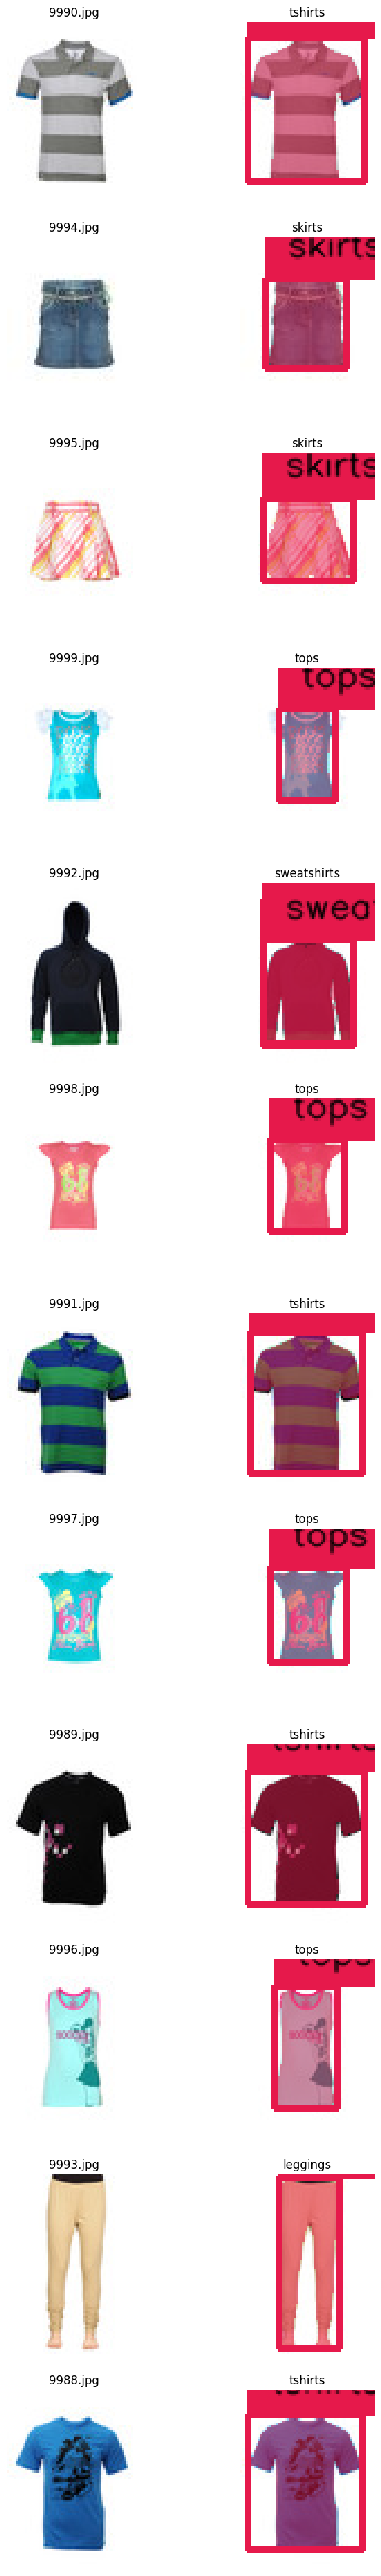

In [24]:
import matplotlib.pyplot as plt

plot_images = []
plot_titles = []

box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()

for image_name, detections in annotations.items():
    image = images[image_name]
    plot_images.append(image)
    plot_titles.append(image_name)  # Use image filename as title

    # Extract cloth_id from image name and get the class
    cloth_id = os.path.splitext(image_name)[0]  # Extract ID (e.g., '9993' from '9993.jpg')
    class_name = cloth_mapping.get(cloth_id, "Unknown")  # Get class from CSV mapping

    # Generate labels dynamically
    labels = [
        f"{class_name} {confidence:.2f}"
        for _, _, confidence, class_id, _ in detections
    ]

    # Apply mask and box annotations
    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

    plot_images.append(annotated_image)
    plot_titles.append(class_name)  # Use dynamic class as title

# Dynamically adjust grid size (2 columns: original & annotated images)
grid_rows = len(annotations)
figsize = (8, grid_rows * 4)  # Adjust size for readability

# Plot the images in a grid
sv.plot_images_grid(
    images=plot_images,
    titles=plot_titles,
    grid_size=(grid_rows, 2),  # Each row: [original image, annotated image]
    size=figsize
)


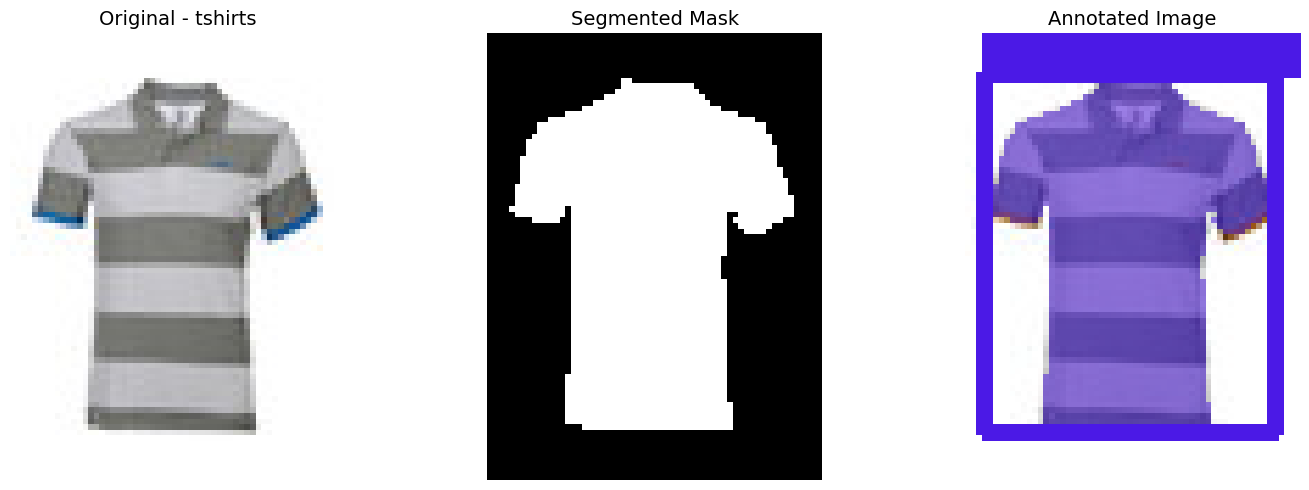

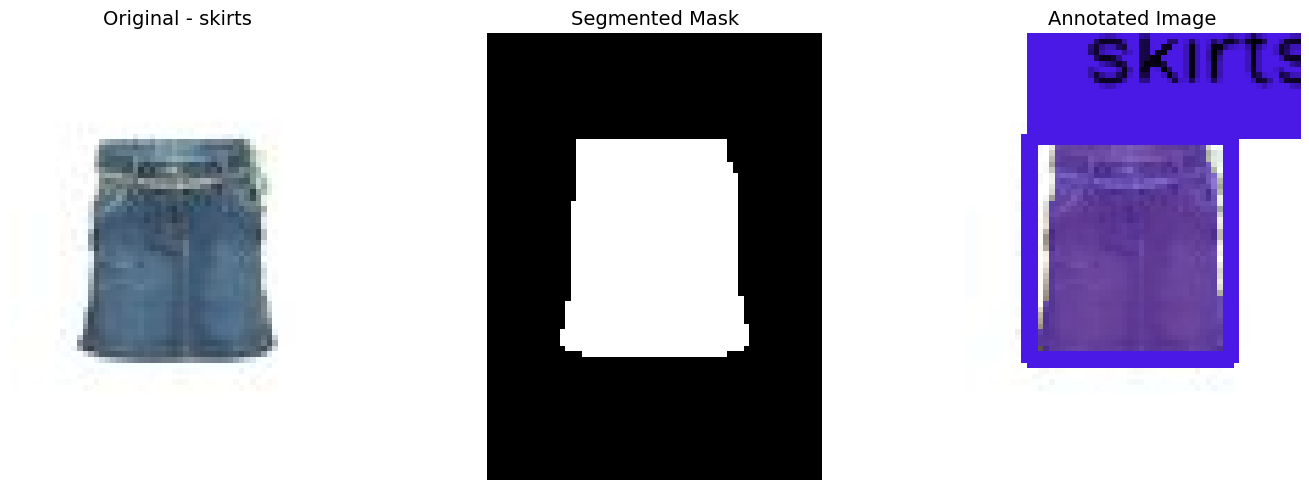

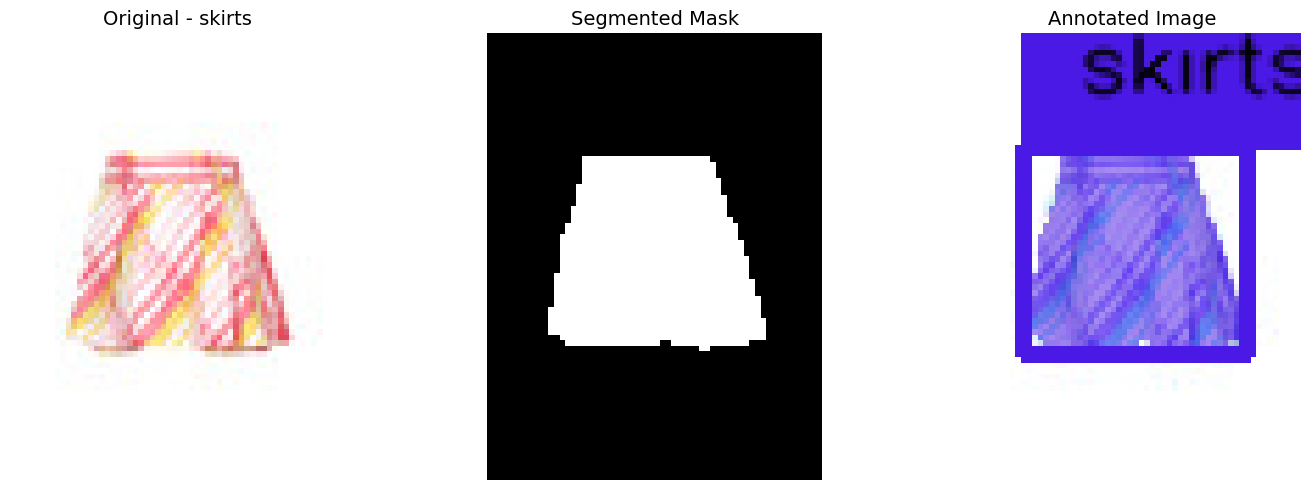

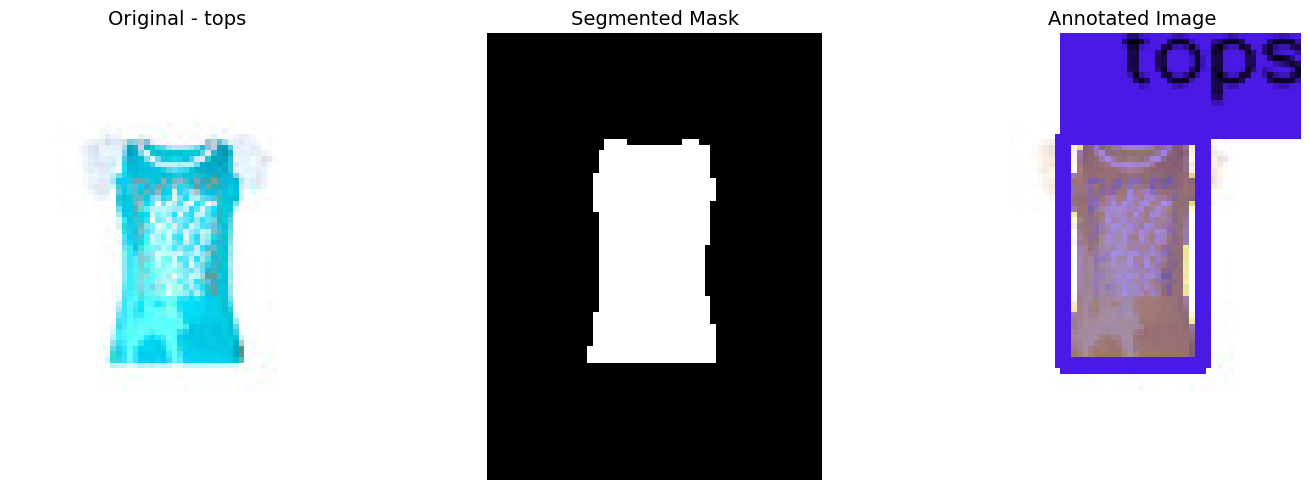

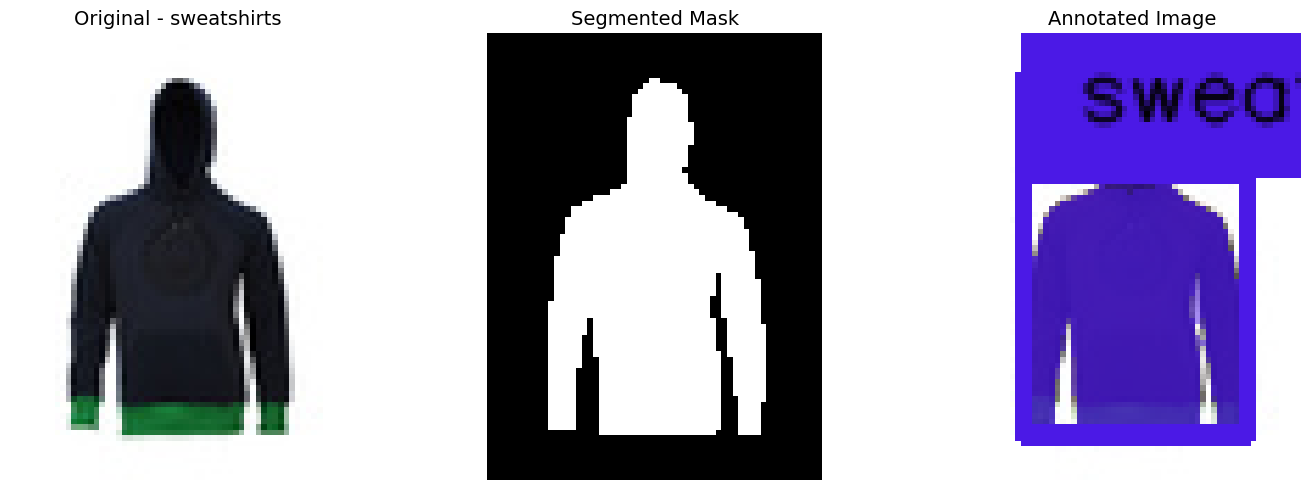

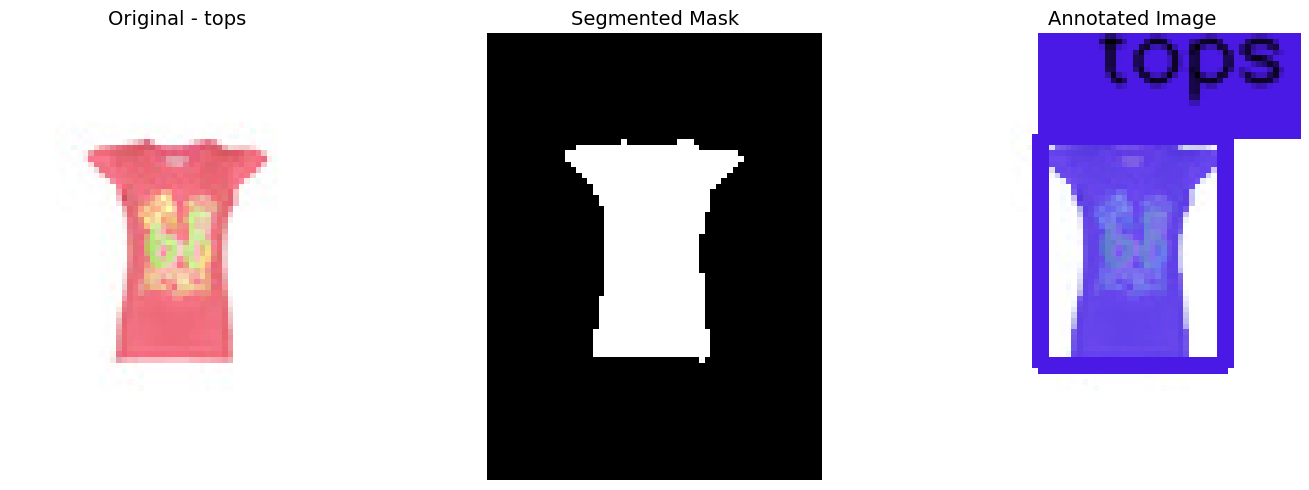

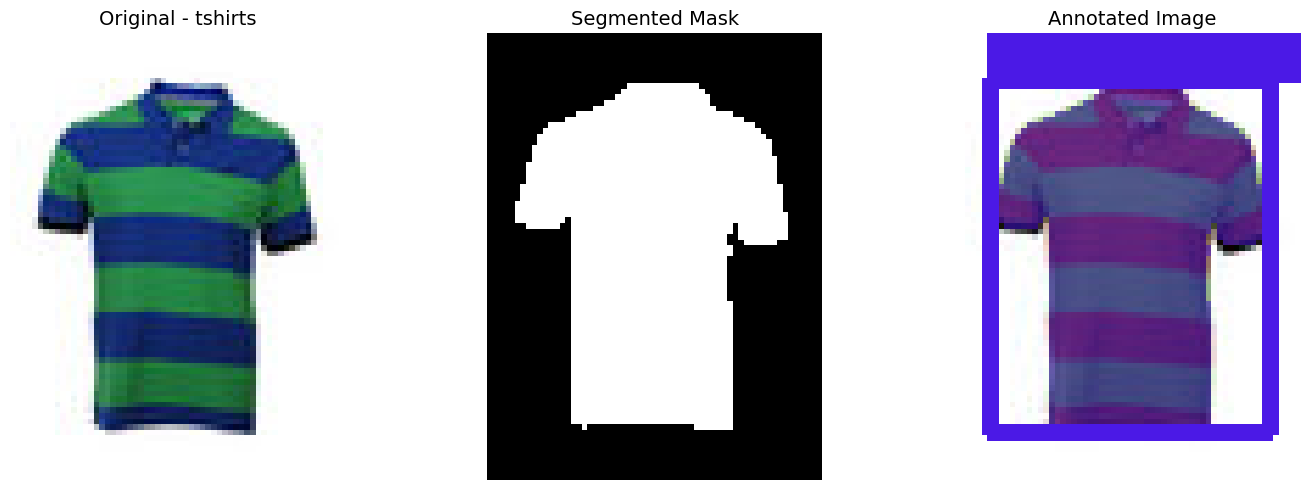

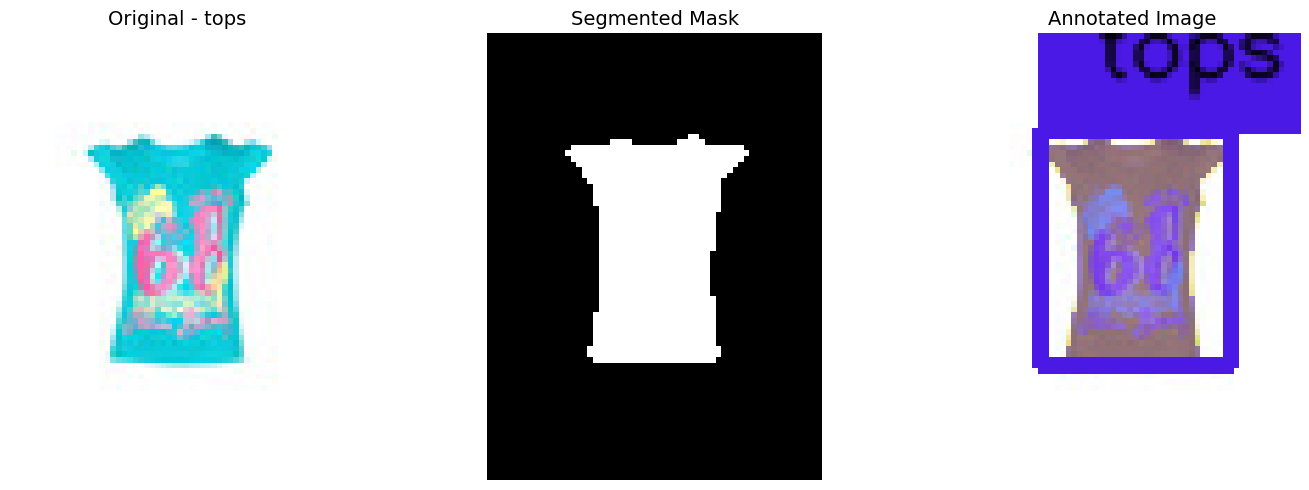

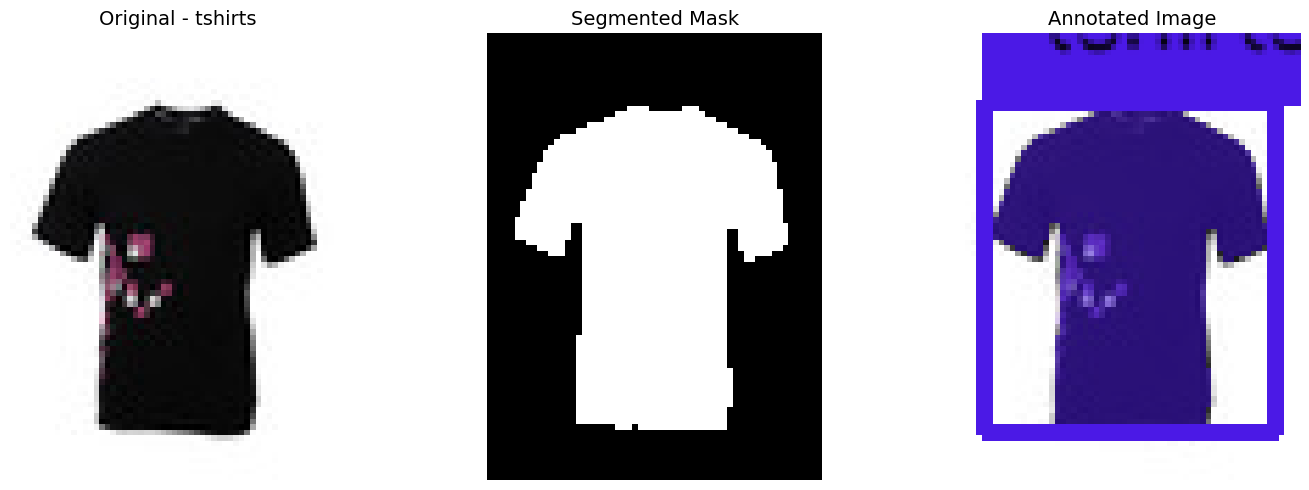

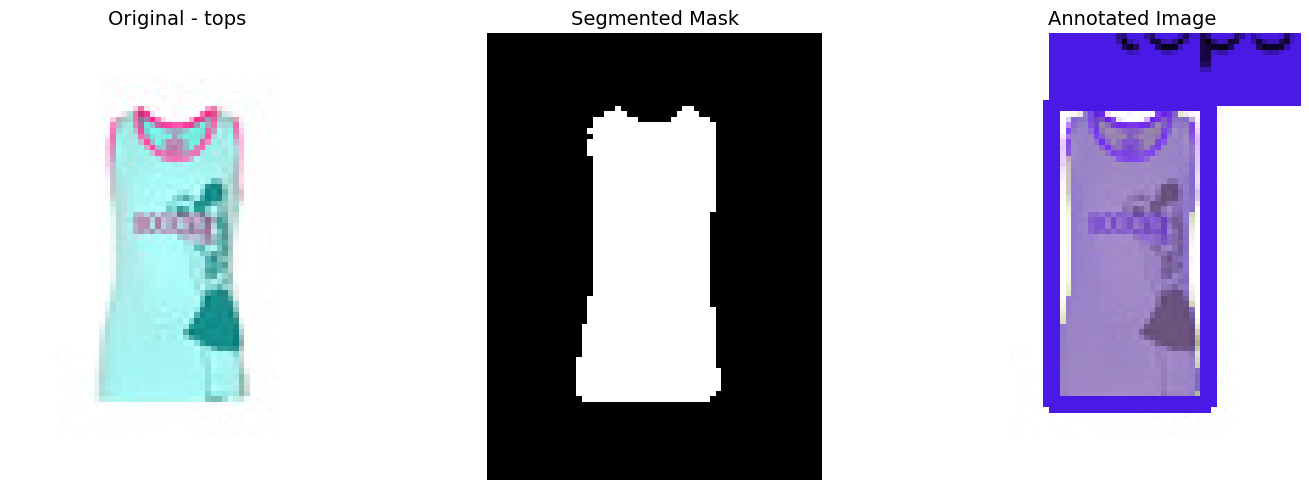

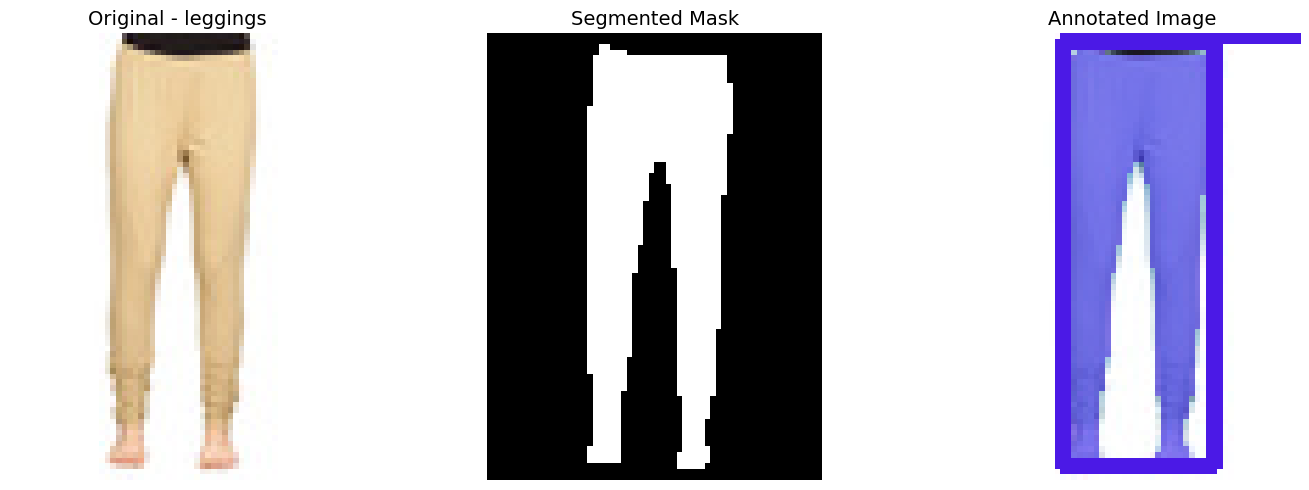

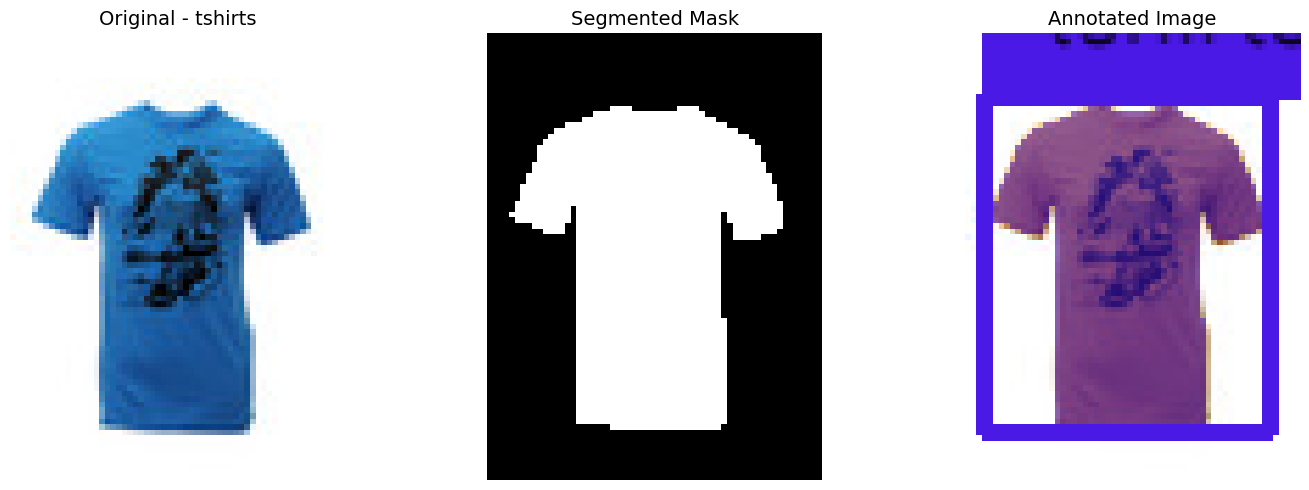

In [25]:
import matplotlib.pyplot as plt

# Iterate over each image and its corresponding detections
for image_name, detections in annotations.items():
    image = images[image_name]

    # Extract cloth_id from filename and find its class
    cloth_id = os.path.splitext(image_name)[0]
    class_name = cloth_mapping.get(cloth_id, "Unknown")  # Get class from CSV mapping

    # Plot the original image
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 3 columns: Original, Mask, Annotated

    # Original Image
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title(f"Original - {class_name}", fontsize=14)
    axes[0].axis("off")

    # Plot the mask if available
    if hasattr(detections, "mask") and len(detections.mask) > 0:
        mask = detections.mask[0]  # Extract the first mask
        axes[1].imshow(mask, cmap="gray")
        axes[1].set_title("Segmented Mask", fontsize=14)
        axes[1].axis("off")
    else:
        axes[1].set_title("No Mask Detected", fontsize=14)
        axes[1].axis("off")

    # Annotated Image with Bounding Box & Mask
    box_annotator = sv.BoxAnnotator()
    mask_annotator = sv.MaskAnnotator()

    labels = [
        f"{class_name} {confidence:.2f}"
        for _, _, confidence, class_id, _ in detections
    ]

    annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

    axes[2].imshow(annotated_image)
    axes[2].set_title("Annotated Image", fontsize=14)
    axes[2].axis("off")

    # Show the final plot
    plt.tight_layout()
    plt.show()
